In [2]:
import pandas as pd

In [12]:
data=pd.read_csv("C:\\Users\HP\OneDrive\Desktop\housing.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
#missing values check
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
#there are no missing values.


In [14]:
corr=data.corr()
corr.shape# work after use select k best ,vif ,use scatter matrix and build model and check which technique is best,
#thats how we will learn what to apply what for best result in that dataset,\. 

(14, 14)

<function matplotlib.pyplot.show(close=None, block=None)>

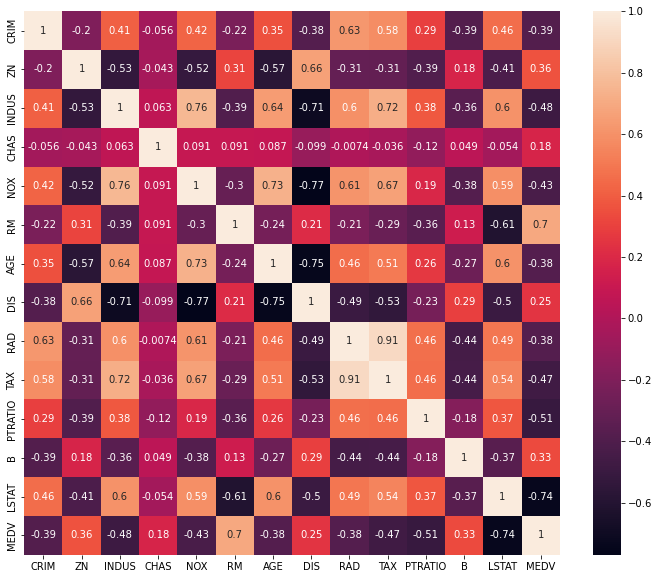

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show

In [ ]:
#since rad and tax are corelated .lets check with scatter plot

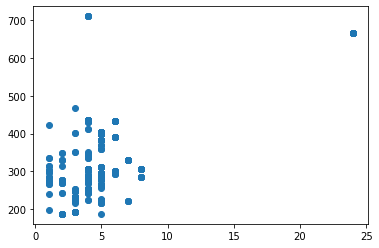

In [18]:
plt.scatter(data.RAD,data.TAX)
plt.show()

In [ ]:
#Since we cannot confirm relationship amd find any trend so we will not delete any features.

In [19]:
#dividing feature and label data
X=data.drop(columns='MEDV',axis=1)
y=data['MEDV']

In [20]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [21]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [27]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)

In [ ]:
#ADA BOOST MODEL TRAINING

In [23]:
from sklearn.ensemble import AdaBoostRegressor

In [24]:
ada=AdaBoostRegressor()

In [28]:
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [ ]:
#Model prediction on train data set

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn import metrics

In [30]:
y_pred=ada.predict(X_train)

In [39]:
accuracy= metrics.r2_score(y_train,y_pred)
print('R square score',accuracy)

R square score 0.9124952537645636


In [ ]:
#Now lets evaluate on testing data

In [41]:
y_pred=ada.predict(X_test)
accuracy= metrics.r2_score(y_test,y_pred)
print('R square score',accuracy)

R square score 0.8361780347069699


In [ ]:
#HYPER PARAMETER TUNING USING RANDOMISED SEARCH CV

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [43]:
dt=DecisionTreeRegressor()

In [44]:
params={'n_estimators':[47,50,60,70],'learning_rate':[0.25,0.30,0.40]}


In [45]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [46]:
rnd_srch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [47]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=70)

In [50]:
ada=AdaBoostRegressor(base_estimator=dt,learning_rate=0.4,n_estimators=70)
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
print('***accuracy post tuning***')
print(metrics.r2_score(y_test,y_pred))


***accuracy post tuning***
0.8768873153947461
